In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/test.csv
input/train.csv


In [2]:
train_data = pd.read_csv("input/train.csv")
test_data = pd.read_csv("input/test.csv")
print(train_data[['Pclass','Cabin','Ticket']])

     Pclass Cabin            Ticket
0         3   NaN         A/5 21171
1         1   C85          PC 17599
2         3   NaN  STON/O2. 3101282
3         1  C123            113803
4         3   NaN            373450
..      ...   ...               ...
886       2   NaN            211536
887       1   B42            112053
888       3   NaN        W./C. 6607
889       1  C148            111369
890       3   NaN            370376

[891 rows x 3 columns]


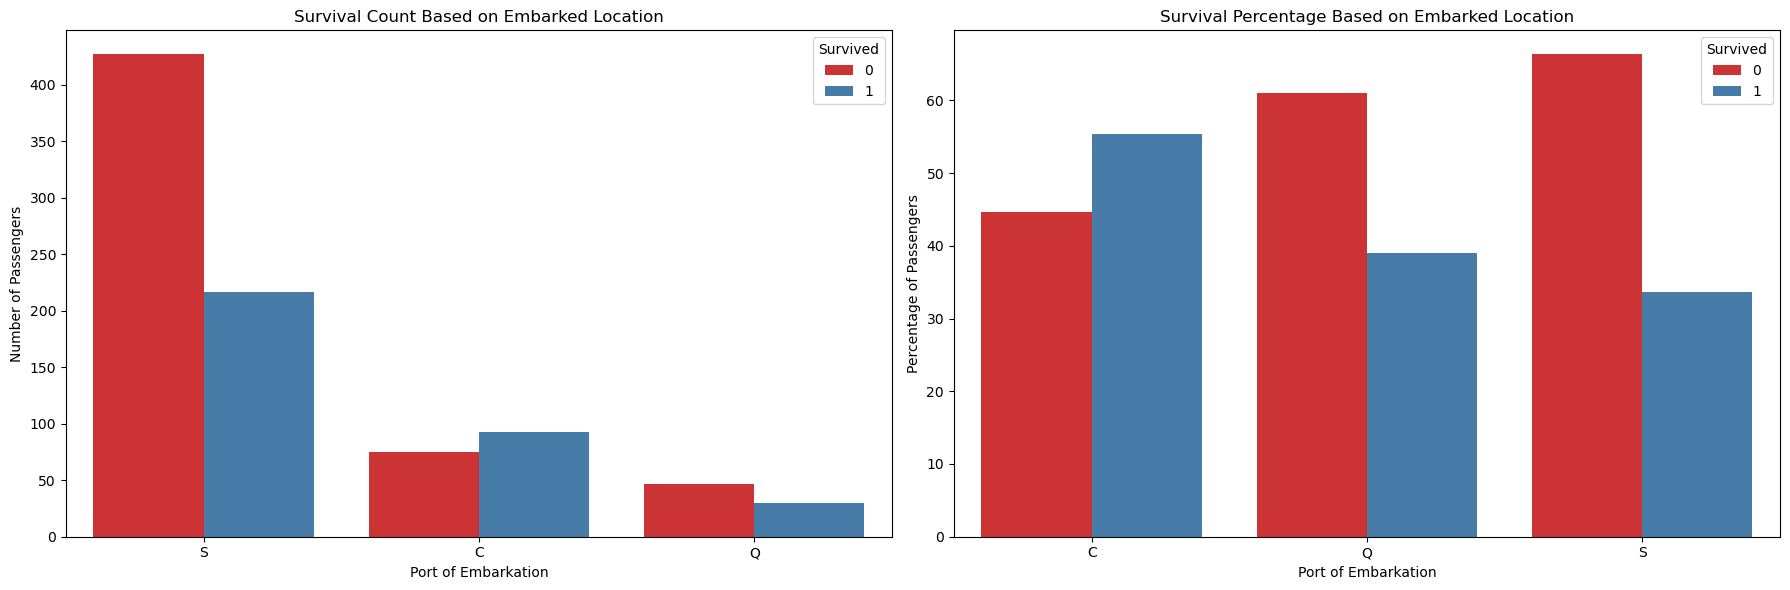

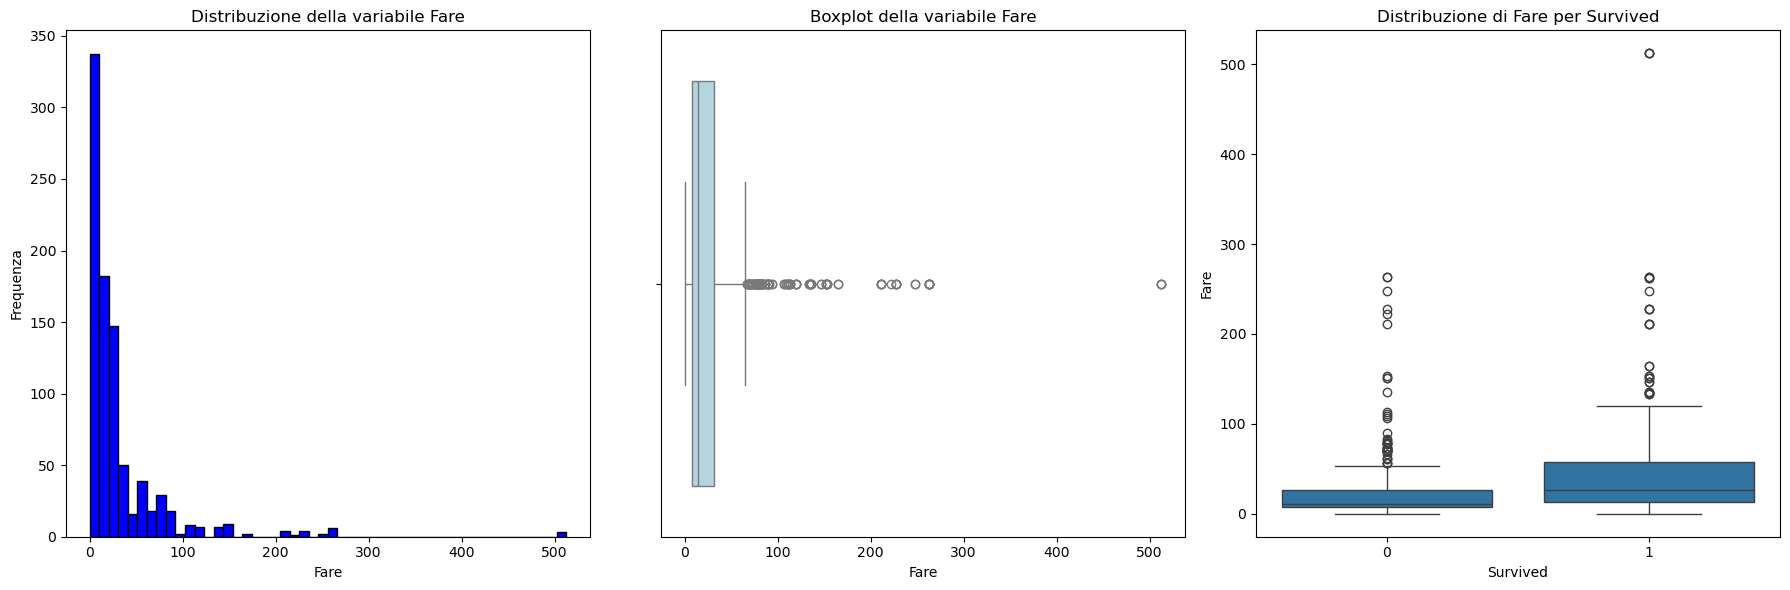

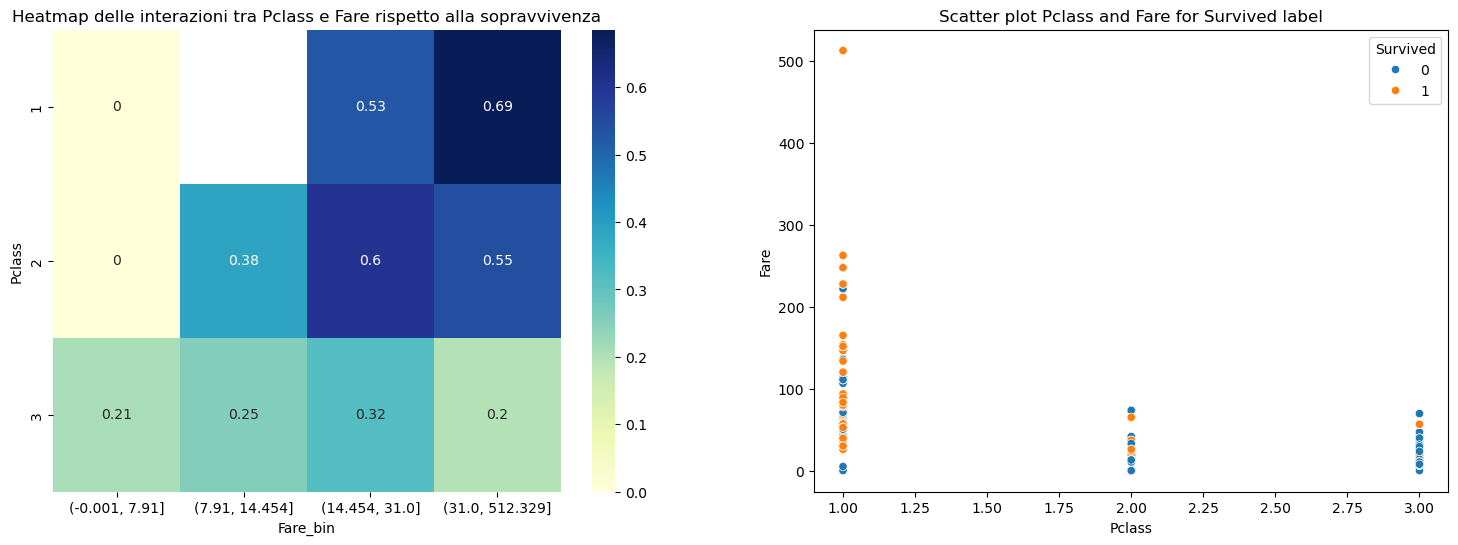

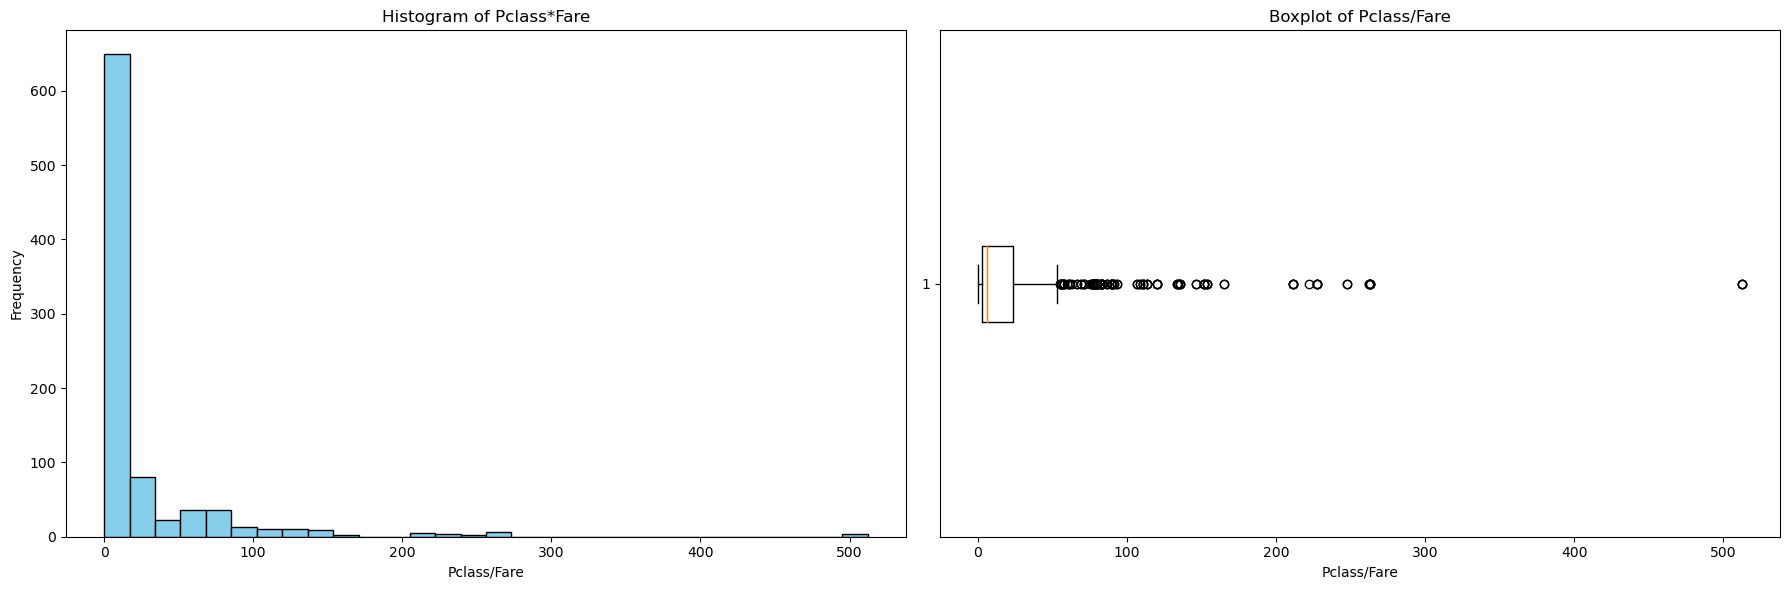

/var/folders/9p/wzgnx2g90z77x77lsjgtckwh0000gn/T/ipykernel_7231/3645346780.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_survival.index, y=ticket_survival.values, palette="viridis", ax=axes[0])


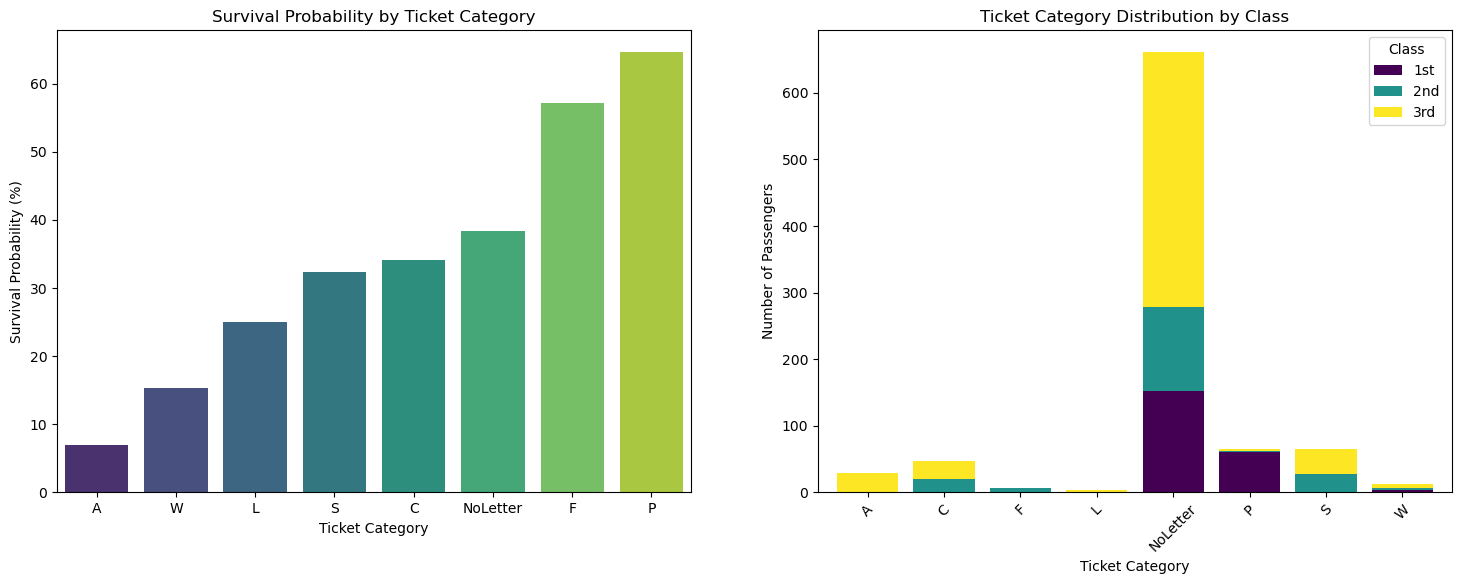

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)

# Calcolare il numero di passeggeri per ciascun porto e sopravvivenza
embarked_survival_counts = train_data.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

# Calcolare le percentuali rispetto al totale dei passeggeri imbarcati in ogni porto
embarked_total_counts = train_data.groupby('Embarked')['PassengerId'].count().reset_index(name='Total')
embarked_survival_counts = pd.merge(embarked_survival_counts, embarked_total_counts, on='Embarked')
embarked_survival_counts['Percentage'] = (embarked_survival_counts['Count'] / embarked_survival_counts['Total']) * 100

# Crea una griglia di 2 grafici su una riga
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Creare un barplot per Embarked e Survived
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette='Set1', ax=axes[0])

# Aggiungere titolo e etichette
axes[0].set_title('Survival Count Based on Embarked Location')
axes[0].set_xlabel('Port of Embarkation')
axes[0].set_ylabel('Number of Passengers')

sns.barplot(data=embarked_survival_counts, x='Embarked', y='Percentage', hue='Survived', palette='Set1')

# Aggiungere titolo e etichette
axes[1].set_title('Survival Percentage Based on Embarked Location')
axes[1].set_xlabel('Port of Embarkation')
axes[1].set_ylabel('Percentage of Passengers')

# Regolazione del layout per evitare sovrapposizioni
plt.tight_layout()

# Mostrare il grafico
plt.show()


# Crea una griglia di 3 grafici su una riga
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Istogramma di Fare
axes[0].hist(train_data['Fare'], bins=50, color='blue', edgecolor='black')
axes[0].set_title('Distribuzione della variabile Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequenza')

# Boxplot di Fare
sns.boxplot(x=train_data['Fare'], color='lightblue', ax=axes[1])
axes[1].set_title('Boxplot della variabile Fare')
axes[1].set_xlabel('Fare')

# Boxplot di Fare suddiviso per Survived
sns.boxplot(x='Survived', y='Fare', data=train_data, ax=axes[2])
axes[2].set_title('Distribuzione di Fare per Survived')
axes[2].set_xlabel('Survived')
axes[2].set_ylabel('Fare')

# Regolazione del layout per evitare sovrapposizioni
plt.tight_layout()

# Visualizzazione dei grafici
plt.show()


# Creiamo dei bin per la variabile Fare per semplificare la visualizzazione
train_data['Fare_bin'] = pd.qcut(train_data['Fare'], 4)  # Divide Fare in quartili

# Creiamo una tabella pivot per visualizzare la sopravvivenza in base a Pclass e Fare_bin
pivot_table = train_data.pivot_table(values='Survived', index='Pclass', columns='Fare_bin', aggfunc='mean', observed=False)

# Visualizziamo la heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Heatmap delle interazioni tra Pclass e Fare rispetto alla sopravvivenza")

sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=train_data, ax=axes[1])
axes[1].set_title('Scatter plot Pclass and Fare for Survived label')

plt.show()

test_data['Fare'] = imputer.fit_transform(test_data[['Fare']])
train_data['Pclass_Fare'] =  train_data['Fare']/train_data['Pclass'] 
test_data['Pclass_Fare'] =  test_data['Fare']/test_data['Pclass'] 

# Istogramma della variabile Fare*Pclass
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].hist(train_data['Pclass_Fare'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Pclass*Fare')
axes[0].set_xlabel('Pclass/Fare')
axes[0].set_ylabel('Frequency')

# Boxplot della variabile Fare*Pclass
axes[1].boxplot(train_data['Pclass_Fare'], vert=False)
axes[1].set_title('Boxplot of Pclass/Fare')
axes[1].set_xlabel('Pclass/Fare')

plt.tight_layout()
plt.show()

# Crea una nuova colonna 'TicketCategory' con la prima lettera del biglietto, o categorizzazioni per mancanza di lettera
train_data['TicketCategory'] = train_data['Ticket'].apply(lambda x: str(x)[0] if pd.notnull(x) and str(x)[0].isalpha() else 'NoLetter' if pd.notnull(x) else 'Missing')
test_data['TicketCategory'] = test_data['Ticket'].apply(lambda x: str(x)[0] if pd.notnull(x) and str(x)[0].isalpha() else 'NoLetter' if pd.notnull(x) else 'Missing')
# Calcola la probabilità di sopravvivenza per ciascuna categoria di biglietto
ticket_survival = train_data.groupby('TicketCategory')['Survived'].mean() * 100  # Percentuale di sopravvivenza

# Ordina per comodità di visualizzazione
ticket_survival = ticket_survival.sort_values()

# Crea il grafico
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=ticket_survival.index, y=ticket_survival.values, palette="viridis", ax=axes[0])
axes[0].set_xlabel("Ticket Category")
axes[0].set_ylabel("Survival Probability (%)")
axes[0].set_title("Survival Probability by Ticket Category")

# Crea una tabella di frequenza per le categorie di biglietto e la classe
ticket_class_counts = train_data.groupby(['TicketCategory', 'Pclass']).size().unstack(fill_value=0)

# Crea il grafico
ticket_class_counts.plot(kind="bar", stacked=True, colormap="viridis", width=0.8, ax=axes[1])
axes[1].set_xlabel("Ticket Category")
axes[1].set_ylabel("Number of Passengers")
axes[1].set_title("Ticket Category Distribution by Class")
axes[1].legend(title="Class", labels=["1st", "2nd", "3rd"])
plt.xticks(rotation=45)
plt.show()


/var/folders/9p/wzgnx2g90z77x77lsjgtckwh0000gn/T/ipykernel_7231/4084633241.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_survival_df, x='AgeGroup', y='Survived', palette="viridis")


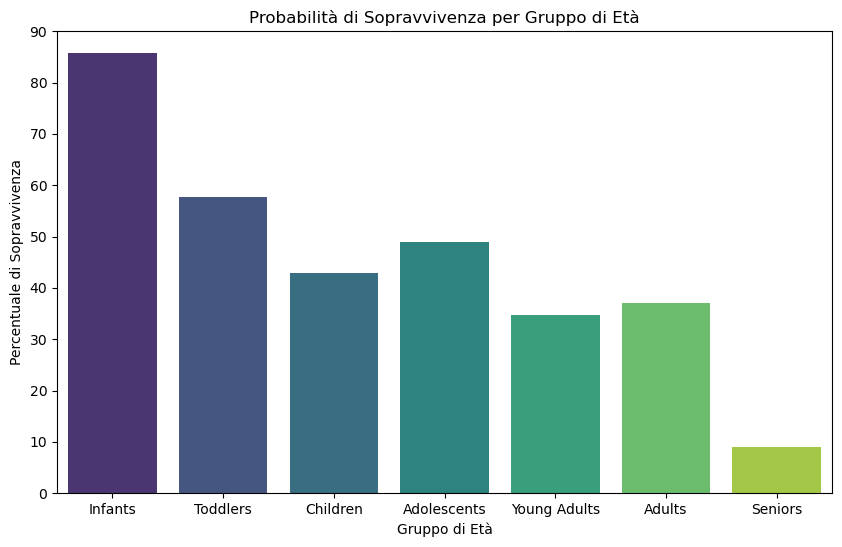

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  ... AgeGroup_Seniors Embarked_Q  Embarked_S  \
0         A/5 21171   7.2500  ...                0          0           1   
1          PC 17599  71.2833  ...                0          0           0   
2  STON/O2. 3101282   7.9250  ...                0          0    

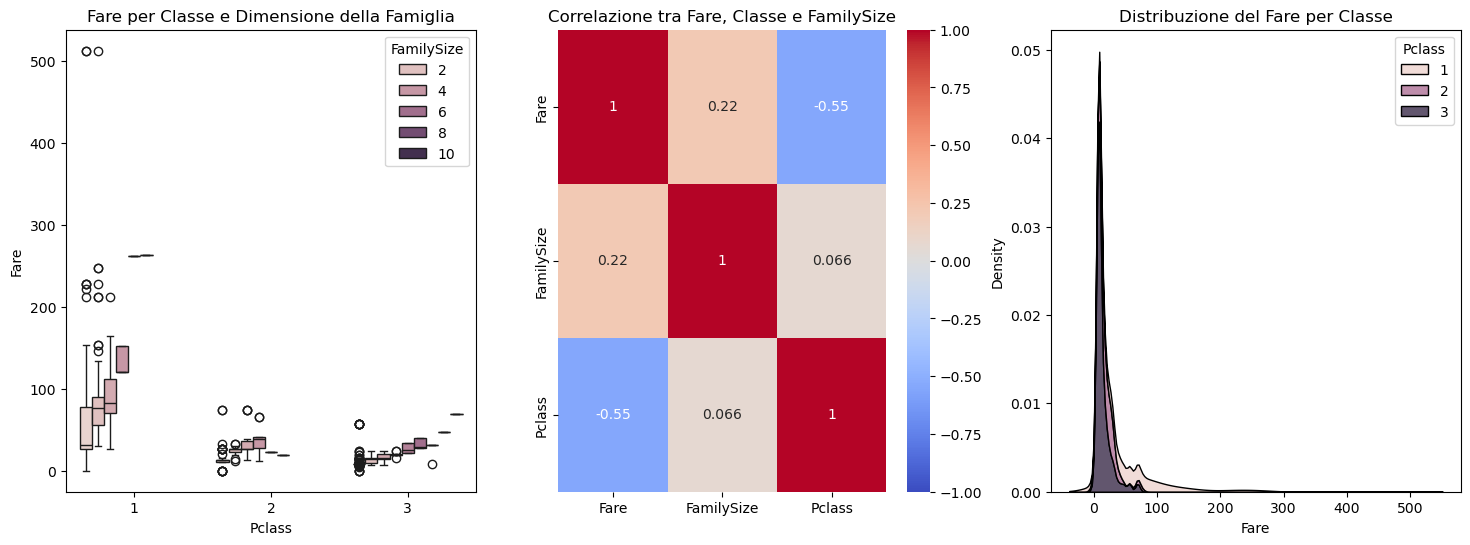

In [4]:
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.fit_transform(test_data[['Age']])


# Conversione della colonna "Sex"
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

#Gestione titolo
# Estrazione del titolo dal nome
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Raggruppa titoli rari
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

# Converti i titoli in numeri
train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)

#Creazione FamilySize e IsAlone feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1
test_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0
test_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1

#Creazione di AgeGroup
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0.0, 1.0, 4.0, 11.0, 17.0, 24.0, 64.0, 100.0],
                 labels=['Infants', 'Toddlers', 'Children', 'Adolescents', 
                         'Young Adults', 'Adults', 'Seniors'])
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=[0.0, 1.0, 4.0, 11.0, 17.0, 24.0, 64.0, 100.0],
                 labels=['Infants', 'Toddlers', 'Children', 'Adolescents', 
                         'Young Adults', 'Adults', 'Seniors'])


# Calcolo della percentuale di sopravvivenza per gruppo di età
age_survival_df = train_data.groupby('AgeGroup', observed=False)['Survived'].mean().reset_index()
age_survival_df['Survived'] = age_survival_df['Survived'] * 100  # Converti in percentuale

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(data=age_survival_df, x='AgeGroup', y='Survived', palette="viridis")
plt.title("Probabilità di Sopravvivenza per Gruppo di Età")
plt.xlabel("Gruppo di Età")
plt.ylabel("Percentuale di Sopravvivenza")
plt.show()

# Crea le variabili dummies per 'AgeGroup'
train_data = pd.get_dummies(train_data, columns=['AgeGroup'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['AgeGroup'], drop_first=True)

#Crea le variabili dummies per 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

#Crea le variabili dummiese per 'TicketCategory'
train_data = pd.get_dummies(train_data, columns=['TicketCategory'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['TicketCategory'], drop_first=True)

# Verifica il risultato
print(train_data.head())

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=train_data, x='Pclass', y='Fare', hue='FamilySize', ax=axes[0])
axes[0].set_title("Fare per Classe e Dimensione della Famiglia")


# Calcolare la matrice di correlazione
corr_matrix = train_data[['Fare', 'FamilySize', 'Pclass']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Correlazione tra Fare, Classe e FamilySize")


sns.kdeplot(data=train_data, x='Fare', hue='Pclass', multiple='stack', ax=axes[2])
axes[2].set_title("Distribuzione del Fare per Classe")

plt.show()


In [5]:
from sklearn.model_selection import train_test_split
train_data=train_data.drop(['Name','Cabin','Ticket', 'SibSp','Parch','Age','Fare_bin','Pclass', 'Fare'],axis=1)
test_data=test_data.drop(['Name','Cabin','Ticket', 'SibSp','Parch','Age','Pclass','Fare'],axis=1)
X_val = test_data.drop(columns = ['PassengerId'])
X = train_data.drop(columns=['Survived','PassengerId'])
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
X_train_dta = X_train
X_test_dta = X_test
X_val_dta = X_val
X_train_dta.head()


clf1 = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'saga', random_state = 1, class_weight = 'balanced')
clf2 = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy', random_state = 0, class_weight = 'balanced')
clf3 = KNeighborsClassifier(n_neighbors = 7, p = 2, metric = 'minkowski')
clf4 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
clf5 = xgb.XGBClassifier(n_estimators = 1500, learning_rate =0.08, max_depth=5, eval_metric='logloss', random_state=42)
pipe1 = Pipeline([['sc', StandardScaler()], ['clf1', clf1]])
pipe2 = Pipeline([['clf2', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],['clf3', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()], ['clf4', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()],['clf5', clf5]])
#'Logistic regression', 'Decision Tree',
clf_labels = ['Logistic regression', 'Decision Tree', 'KNN', 'Random Forest', 'XGBoost']
print('10-fold cross validation:\n')
pipes = [pipe1, pipe2, pipe3,pipe4, pipe5]

# Festure importance per RandomForestClassifier e XGboost

# 1. Addestramento del modello
X_train_dta_np = X_train_dta.values  # .values restituisce l'array senza i nomi delle feature

pipe1.fit(X_train_dta, y_train)  # Logistic Regression
pipe2.fit(X_train_dta_np, y_train)  # Decision Tree
pipe3.fit(X_train_dta, y_train)  # KNN
pipe4.fit(X_train_dta, y_train)  # Random Forest
pipe5.fit(X_train_dta, y_train)  # XGBoost

#clf4.fit(X_train, y_train)

# 2. Estrazione delle importanze
importances = clf4.feature_importances_

# 3. Visualizzazione delle importanze
# Creiamo un dataframe per le importanze
feat_importances = pd.Series(importances, index=X_train_dta.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Grafico
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.show()

# 1. Addestramento del modello
clf5.fit(X_train_dta, y_train)

# 2. Visualizzazione delle importanze (usando plot_importance)
plt.figure(figsize=(10, 6))
xgb.plot_importance(clf5, max_num_features=15)  # Mostra le 10 feature più importanti
plt.title('Feature Importance - XGBoost')
plt.show()

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Lista di classificatori e nomi

classifiers = {
    'Logistic Regression': pipe1.named_steps['clf1'],
    'Decision Tree': pipe2.named_steps['clf2'],
    'KNN': pipe3.named_steps['clf3'],
    'Random Forest': pipe4.named_steps['clf4'],
    'XGBoost': pipe5.named_steps['clf5']
}

# Per ogni classificatore, calcola l'importanza delle feature e visualizza il grafico
# Dizionario per salvare le importanze delle feature per ciascun modello
feature_importances = pd.DataFrame()

# Calcolo delle importanze delle feature per ciascun modello
for name, clf in classifiers.items():
    results = permutation_importance(clf, X_train_dta_np, y_train, n_repeats=10, random_state=42, n_jobs=-1)
    feat_importances = pd.Series(results.importances_mean, index=X_train_dta.columns)
    
    # Aggiungiamo i risultati al DataFrame
    feature_importances[name] = feat_importances

# Trasformiamo il DataFrame per avere un formato lungo (necessario per il grafico)
feature_importances = feature_importances.reset_index().melt(id_vars="index", 
                                                             var_name="Modello", 
                                                             value_name="Importanza")
feature_importances = feature_importances.rename(columns={"index": "Feature"})

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x="Feature", y="Importanza", hue="Modello")
plt.xticks(rotation=45, ha='right')
plt.title("Importanza delle feature per ciascun modello")
plt.ylabel("Mean decrease in accuracy")
plt.legend(title="Modello")
plt.tight_layout()
plt.show()

10-fold cross validation:



In [ ]:
from sklearn.metrics import accuracy_score
features_lr = ['Title_Mr','Pclass_Fare', 'Sex', 'AgeGroup_Adults','AgeGroup_Young Adults','AgeGroup_Adolescents','Embarked_S','Embarked_Q']
features_dt = ['Title_Mr','Pclass_Fare','FamilySize','Title_Rare','AgeGroup_Young Adults','TicketCategory_S', 'TicketCategory_W']
features_knn = ['Pclass_Fare','Title_Mr','Sex']
features_rf = ['Sex','FamilySize','Title_Mrs','Title_Miss']
features_xg = ['Pclass_Fare','Title_Mr','FamilySize','AgeGroup_Adults','Embarked_S','TicketCategory_NoLetter','TicketCategory_S','AgeGroup_Young Adults','AgeGroup_Children','Embarked_Q']

X_train_dta_LR = X_train_dta[features_lr]
X_train_dta_DT = X_train_dta[features_dt]
X_train_dta_KNN = X_train_dta[features_knn]
X_train_dta_RF = X_train_dta[features_rf]
X_train_dta_XG = X_train_dta[features_xg]

X_test_dta_LR = X_test_dta[features_lr]
X_test_dta_DT = X_test_dta[features_dt]
X_test_dta_KNN = X_test_dta[features_knn]
X_test_dta_RF = X_test_dta[features_rf]
X_test_dta_XG = X_test_dta[features_xg]

X_val_dta_LR = X_val_dta[features_lr]
X_val_dta_DT = X_val_dta[features_dt]
X_val_dta_KNN = X_val_dta[features_knn]
X_val_dta_RF = X_val_dta[features_rf]
X_val_dta_XG = X_val_dta[features_xg]

#Valutazione Accuracy sui singoli modelli con le features specifiche
print('10-fold cross validation:\n')
scores_LR = cross_val_score(estimator=pipe1, X = X_train_dta_LR, y=y_train, cv=10, scoring='accuracy')
print(f'Accuracy: {scores_LR.mean():.2f}'
      f'(+/- {scores_LR.std():-2f}) Logistic Regression')

scores_DT = cross_val_score(estimator=pipe2, X = X_train_dta_DT, y=y_train, cv=10, scoring='accuracy')
print(f'Accuracy: {scores_DT.mean():.2f}'
      f'(+/- {scores_DT.std():-2f}) Decision Tree')

scores_KNN = cross_val_score(estimator=pipe3, X = X_train_dta_KNN, y=y_train, cv=10, scoring='accuracy')
print(f'Accuracy: {scores_KNN.mean():.2f}'
      f'(+/- {scores_KNN.std():-2f}) KNN')

scores_RF = cross_val_score(estimator=pipe4, X = X_train_dta_RF, y=y_train, cv=10, scoring='accuracy')
print(f'Accuracy: {scores_RF.mean():.2f}'
      f'(+/- {scores_RF.std():-2f}) Random Forest')

scores_XG = cross_val_score(estimator=pipe5, X = X_train_dta_XG, y=y_train, cv=10, scoring='accuracy')
print(f'Accuracy: {scores_XG.mean():.2f}'
      f'(+/- {scores_XG.std():-2f}) XGBoost')

#Allenamento modelli, fit e valutazione accuracy
pipe1.fit(X_train_dta_LR, y_train)  # Logistic Regression
pipe2.fit(X_train_dta_DT, y_train)  # Decision Tree
pipe3.fit(X_train_dta_KNN, y_train)  # KNN
pipe4.fit(X_train_dta_RF, y_train)  # Random Forest
pipe5.fit(X_train_dta_XG, y_train)  # XGBoost

y_train_dta_LR = pipe1.predict(X_train_dta_LR)
y_train_dta_DT = pipe2.predict(X_train_dta_DT)
y_train_dta_KNN = pipe3.predict(X_train_dta_KNN)
y_train_dta_RF = pipe4.predict(X_train_dta_RF)
y_train_dta_XG = pipe5.predict(X_train_dta_XG)

y_test_dta_LR = pipe1.predict(X_test_dta_LR)
y_test_dta_DT = pipe2.predict(X_test_dta_DT)
y_test_dta_KNN = pipe3.predict(X_test_dta_KNN)
y_test_dta_RF = pipe4.predict(X_test_dta_RF)
y_test_dta_XG = pipe5.predict(X_test_dta_XG)

y_val_dta_LR = pipe1.predict(X_val_dta_LR)
y_val_dta_DT = pipe2.predict(X_val_dta_DT)
y_val_dta_KNN = pipe3.predict(X_val_dta_KNN)
y_val_dta_RF = pipe4.predict(X_val_dta_RF)
y_val_dta_XG = pipe5.predict(X_val_dta_XG)

#Assemblaggio delle predizione e valutazione delle accuracy
y_pred_dta_train = np.round((scores_LR.mean()*y_train_dta_LR + scores_DT.mean()*y_train_dta_DT + scores_KNN.mean()*y_train_dta_KNN + 
                                scores_RF.mean()*y_train_dta_RF + scores_XG.mean()*y_train_dta_XG) / (scores_LR.mean()+scores_DT.mean()+scores_KNN.mean()+scores_RF.mean()+scores_XG.mean())).astype(int)
y_pred_dta_test = np.round((scores_LR.mean()*y_test_dta_LR + scores_DT.mean()*y_test_dta_DT + scores_KNN.mean()*y_test_dta_KNN + 
                                scores_RF.mean()*y_test_dta_RF + scores_XG.mean()*y_test_dta_XG) / (scores_LR.mean()+scores_DT.mean()+scores_KNN.mean()+scores_RF.mean()+scores_XG.mean())).astype(int)

y_pred_dta_val = np.round((scores_LR.mean()*scores_LR.mean()*y_val_dta_LR + scores_DT.mean()*y_val_dta_DT + scores_KNN.mean()*y_val_dta_KNN + 
                                scores_RF.mean()*y_val_dta_RF + scores_XG.mean()*y_val_dta_XG) / (scores_LR.mean()+scores_DT.mean()+scores_KNN.mean()+scores_RF.mean()+scores_XG.mean())).astype(int)

fp_dta_train_acc = accuracy_score(y_train, y_pred_dta_train)
fp_dta_test_acc = accuracy_score(y_test, y_pred_dta_test)

print(f'Accuracy_train/accuracy_test '
      f'{fp_dta_train_acc:.3f}/{fp_dta_test_acc:.3f}')

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Addestrare i modelli di base e ottenere le previsioni su X_train e X_val
train_meta_features = [y_train_dta_LR, y_train_dta_DT, y_train_dta_KNN, y_train_dta_RF, y_train_dta_XG]
val_meta_features = [y_val_dta_LR, y_val_dta_DT, y_val_dta_KNN, y_val_dta_RF, y_val_dta_XG]
test_meta_features = [y_test_dta_LR, y_test_dta_DT, y_test_dta_KNN, y_test_dta_RF, y_test_dta_XG]


# Trasforma le liste in matrici per il meta-modello
train_meta_features = np.array(train_meta_features).T  # Trasposta per ottenere una riga per ciascun esempio
val_meta_features = np.array(val_meta_features).T
test_meta_features = np.array(test_meta_features).T

# 2. Addestrare il meta-modello Bernoulli Naive Bayes
meta_model = BernoulliNB()
meta_model.fit(train_meta_features, y_train)

# 3. Valutare il meta-modello
train_preds = meta_model.predict(train_meta_features)
val_preds = meta_model.predict(val_meta_features)
test_preds = meta_model.predict(test_meta_features)

# Calcolare l'accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy del meta-modello: {train_accuracy:.4f}")
print(f"Test Accuracy del meta-modello: {test_accuracy:.4f}")

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': val_preds})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
